In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
price = yf.download("AMZN KO TSLA WMT HD CVS ORCL ADBE BAC JPM PG KO UNH PEP V TMO BABA", start = "2018-01-01", end = "2022-10-01")["Adj Close"]
price = price.asfreq("B")

[*********************100%***********************]  16 of 16 completed


In [3]:
def return_series(price:pd.DataFrame):
    return ((price/price.shift(1))-1)[1:]

In [4]:
def annualised_return(daily_return:pd.DataFrame,n_period_per_year:int):
    compound = (1+daily_return).prod()
    n_period = daily_return.shape[0]
    return compound**(n_period_per_year/n_period)-1

In [5]:
def annualised_volatility(daily_return:pd.DataFrame,n_period_per_year:int):
    return daily_return.std()*(np.sqrt(n_period_per_year))

In [6]:
def VaR(daily_return, confidence_level =5):
    if isinstance(daily_return,pd.DataFrame):
        return daily_return.aggregate(VaR,confidence_level = confidence_level)
    elif isinstance(daily_return,pd.Series):
        return -np.percentile(daily_return,confidence_level)
    else:
        raise TypeError("Feed either a dataframe or series")

In [7]:
def CVaR(daily_return, confidence_level =5):
    if isinstance(daily_return,pd.Series):
        less_than_VaR=daily_return<=-VaR(daily_return,confidence_level = confidence_level)
        return -daily_return[less_than_VaR].mean()
    elif isinstance(daily_return,pd.DataFrame):
        return daily_return.aggregate(CVaR,confidence_level=confidence_level)
    else:
        raise TypeError("Feed either dataframe or a series")

In [8]:
def sharpe_ratio(daily_return:pd.DataFrame,risk_free_rate:float,n_period_per_year:int):
    daily_risk_free_rate = (1+risk_free_rate)**(1/n_period_per_year)-1
    excess_return= daily_return-daily_risk_free_rate
    annualise_excess_return = annualised_return(excess_return,n_period_per_year)
    annualise_volatility = annualised_volatility(daily_return,n_period_per_year)
    return annualise_excess_return/annualise_volatility

In [9]:
daily_return=return_series(price)
daily_return_1=daily_return.asfreq("B")
daily_return_1.isna().sum()
daily_return_2 = daily_return_1.fillna(method="ffill")

<AxesSubplot:>

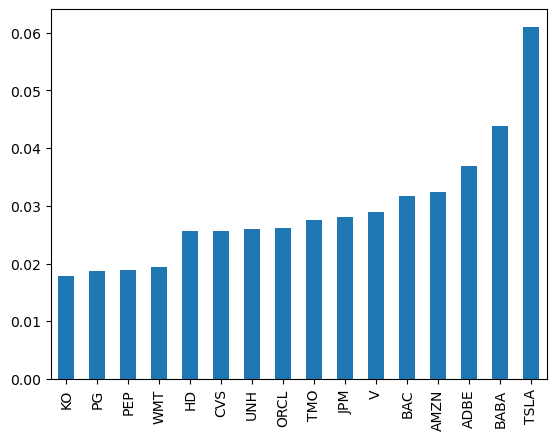

In [10]:
VaR(daily_return_2).sort_values().plot.bar()

<AxesSubplot:>

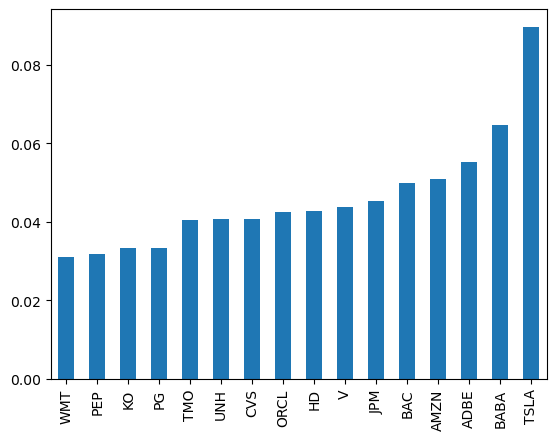

In [11]:
CVaR(daily_return_2).sort_values().plot.bar()

<AxesSubplot:>

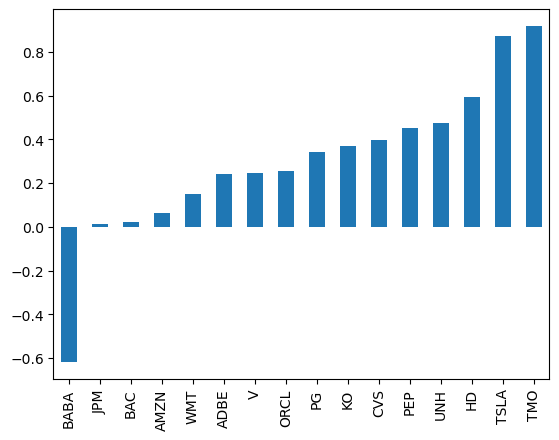

In [12]:
s =sharpe_ratio(daily_return_2,0.05,252)
s.sort_values().plot.bar()